In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the seed for numpy
np.random.seed(42)

# Set plots style
plt.style.use('seaborn-v0_8')

# Dataset

In [8]:
# import the dataset
df = pd.read_csv('Dataset/leaf.csv',names=['Class','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity','Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness','Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy'])
df.drop('Specimen Number', axis=1, inplace=True)
df.head()

,Class,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [9]:

# Select the columns to be standardized
columns_to_standardize = ['Eccentricity', 'Aspect Ratio', 'Elongation', 'Solidity', 'Stochastic Convexity',
                          'Isoperimetric Factor', 'Maximal Indentation Depth', 'Lobedness', 'Average Intensity',
                          'Average Contrast', 'Smoothness', 'Third moment', 'Uniformity', 'Entropy']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


In [10]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1),df['Class'], test_size=0.2, random_state=42)

# Print the shapes of the training set and test set
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (272, 14)
Test set shape: (68, 14)


# Svm

In [22]:
# Create the SVM classifier
svm_clf = SVC()

# Perform cross-validation and calculate accuracy
scores = cross_val_score(svm_clf, df.drop('Class', axis=1), df['Class'], cv=5)
accuracy = scores.mean()

print("Cross-Validation Accuracy:", accuracy)

Cross-Validation Accuracy: 0.6617647058823529


### Grid search

In [6]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10, 'scale'],
    'decision_function_shape' : ['ovo','ovr']
}

# Create the SVM classifier
svm_clf = SVC()

# Perform grid search
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'linear'}


### Feature importance

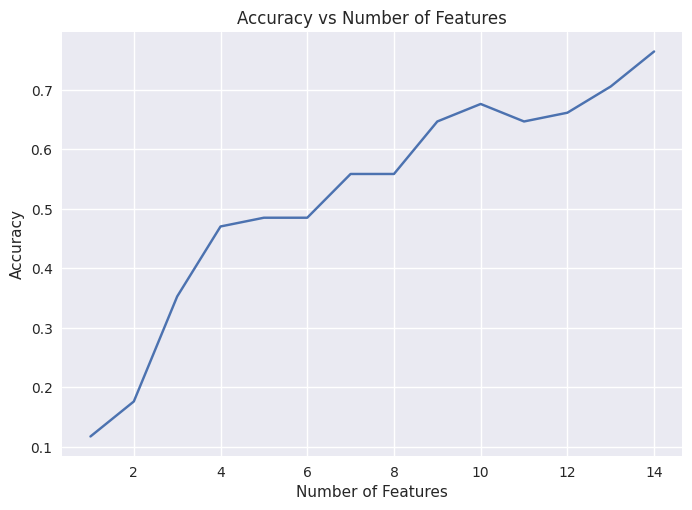

In [25]:
# Get the feature importances from the SVM classifier
feature_importances = best_svm_clf.coef_[0]

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()


# Get the names of the features
feature_names = df.drop('Class', axis=1).columns

# Get the number of features
num_features = len(feature_names)

# Get the accuracy values
accuracy_values = []

for i in range(1, num_features + 1):
    # Select the first i features
    selected_features = feature_names[:i]

    # Train the SVM classifier with the selected features
    svm_clf.fit(X_train[selected_features], y_train)

    # Predict the class labels for the test dataset using the trained classifier
    svm_pred_labels = svm_clf.predict(X_test[selected_features])

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, svm_pred_labels)

    # Append the accuracy to the list
    accuracy_values.append(accuracy)

# Plot the accuracy vs the number of features
plt.plot(range(1, num_features + 1), accuracy_values)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.show()

# Results

In [14]:
clf = SVC(**best_params)

# Calculate the cross-validation scores
scores = cross_val_score(clf, df.drop('Class', axis=1), df['Class'], cv=5)
accuracy = scores.mean()

# Calculate the weighted accuracy
scorer = make_scorer(balanced_accuracy_score)
scores = cross_val_score(clf, df.drop('Class', axis=1), df['Class'], cv=5, scoring=scorer)
balanced_acc = scores.mean()

# Calculate the f1 score
scorer = make_scorer(f1_score, average='weighted')
scores = cross_val_score(clf, df.drop('Class', axis=1), df['Class'], cv=5, scoring=scorer)
f1 = scores.mean()


# Print the best parameters and best score
print("Cross Accuracy:", accuracy)
print("Weighted Accuracy:", balanced_acc)
print("F1 Score:", f1)

Cross Accuracy: 0.7764705882352941
Weighted Accuracy: 0.7766666666666666
F1 Score: 0.7624229691876752
